In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Exploratory Data Analysis: Identifying Pulsar Stars

Name: Trevor Kling

Course: CPSC 392 - Introduction to Data Science

Last Date Modified: 12/03/2019

## Introduction
A "pulsar" is a rare type of neutron star that emits electromagnetic radiation which is perceptible from Earth.  However, like any radiation from space, this is accompanied by a large degree of cosmic background radiation which can make it difficult to percieve where and when pulsars occur.  The following data set documents a variety of stars which met conditions to be pulsars, as well as labels for these stars which indicate whether they truly were pulsars.  Pulsars offer the ability to document a variety of large-scale cosmic phenomena like gravitational waves or the curvature of spacetime.  Thus, being able to correctly identify where pulsars exist is an important question to astronomers.

## Importing the Data Set

The dataset used for this analysis was obtained from the paper "Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach" by R. J. Lyon et al., originally published in Monthly Notices of the Royal Astronomical Society 459 [[1](https://arxiv.org/pdf/1603.05166.pdf)].  The actual files were retreived from the UCI Machine Learning Database at https://archive.ics.uci.edu/ml/datasets/HTRU2 on 12/3/2019.

In [48]:
data = pd.read_csv("pulsar_stars.csv", header=0)

In [49]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


The dataset includes a variety of extended statistics, such as the mean, the standard deviation, the kurtosis, and the skewness.  The primary goal of the dataset is to allow for the production of a model of these pulsars based on these statistics.

## Analysis: Basic Trends

The first questions of interest simply relate to understanding the data set as a whole.

### Data Set Size and Types

In [50]:
data.shape

(17898, 9)

The pandas `shape` attribute gives us the dimensions of our data matrix.  From this, we can clearly see that there are 17898 rows (or entries) and 9 columns (or attributes).

### Breaking Down the Attributes

The data contained in this data matrix can be widely classified in two types; those relating to the integrated profile, and those relating to the DM-SNR curve.

#### The Integrated Profile

The *integrated profile*, or more formally the *integrated pulse profile*, can be thought of as a pulsar's cosmic fingerprint [[2](http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf)].  A pulsar generates periodic pulsation signals as it rotates, but each individual signal is often too weak to detect and can vary greatly in shape.  Instead, we integrate over a large number of instantaneous pulse periods to gain an overall profile of what the emissions from the pulsar look like over a substantial periood of time [[3](https://www.cv.nrao.edu/course/astr534/PulsarTiming.html)].  This allows us to determine an average pulse, which is relatively stable with changes in time.  These profiles can be simple or complex, and allow us to identify pulsars by only their radiation.

#### DM-SNR Curve

The *Dispersion Measure-Signal to Noise Ratio Curve*, or *DM-SNR Curve* for short, is another way of classifying a pulsar.  When the pulsar emits electromagnetic radiation, the dispersion by free electrons in the interstellar medium (a bunch of plasma, made up of ionized electrons and other small particles) causes a frequency dependent delay in the radiation as it propagates through the interstellar medium. This causes pulsar emissions to become temporally distorted, by an amount proportional to a quantity called the Dispersion Measure.  This is roughly the density of free electrons between our observatory and the pulsar, in a straight line.  Importantly, for a pulsar, minimizing this Dispersion Measure also corresponds to increasing the Signal to Noise ratio of the received radiation.

#### The Actual Attributes

In the data set, both the Integrated Profile and the DM-SNR curve have 4 attributes; *Mean*, *Standard Deviation*, *Excess Kurtosis*, and *Skewness*.  The mean and standard deviation are exactly what you would expect; they're the arithmetic mean and standard deviation of the observed values.  The kurtosis and skewness may be less familiar; these are what are known as *shape* summary statistics.  Both of these variables describe the shape of a probability distrobution for the given instance; a high kurtosis indicates the presence of many outliers, and a large skewness indicates a longer tail on one side of the distrobution.

![Example of Skew](https://upload.wikimedia.org/wikipedia/commons/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg)

**Figure 1: An Example of Skew [[4](https://en.wikipedia.org/wiki/Skewness)]**

### Checking for Missing Values

In [51]:
nulls = data[data.isnull().any(axis=1)]
print(nulls)

Empty DataFrame
Columns: [ Mean of the integrated profile,  Standard deviation of the integrated profile,  Excess kurtosis of the integrated profile,  Skewness of the integrated profile,  Mean of the DM-SNR curve,  Standard deviation of the DM-SNR curve,  Excess kurtosis of the DM-SNR curve,  Skewness of the DM-SNR curve, target_class]
Index: []


There are no entries in this data set which contain null values.  This is unsurprising, as this data set was produced for scientific study based on averages and has likely already undergone basic analysis.

## Extended Analysis: Preferred Indicator

As the data set presents us with two groups of similar attributes, a natural question is which group provides a better indicator that a particular instance is a pulsar.  One method of determining this is to look at the summary statistics within the set of instances that *are* pulsars versus the summary statistics of those that *are not* pulsars.  For a good discriminator, the expectation would be observably different mean values with low standard deviations; in other words, the distrobutions of each should have little overlap.

First, let's split the data into two sets; those that are pulsars, and those that are not.

In [52]:
pulsars_data = data[data["target_class"] == 1]
other_data = data[data["target_class"] == 0]

In [53]:
pulsars_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1
...,...,...,...,...,...,...,...,...,...
17515,89.867188,47.482295,1.591325,2.505057,0.763378,12.393561,17.940745,333.902631,1
17529,27.039062,33.754722,4.779124,26.255357,129.863712,78.815440,-0.348492,-0.893791,1
17558,77.070312,39.000638,1.884421,6.372178,38.517559,65.741059,1.589513,1.285346,1
17642,28.375000,27.649311,6.377273,45.944048,141.860368,82.893017,-0.477222,-1.067880,1


In [54]:
other_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


Now, we check the mean and standard deviations:

In [55]:
pulsar_means = {}
for i in pulsars_data.columns[0:-1]:
    pulsar_means[i] = pulsars_data[i].mean()
print(pulsar_means)

{' Mean of the integrated profile': 56.690607840146434, ' Standard deviation of the integrated profile': 38.71059825091519, ' Excess kurtosis of the integrated profile': 3.1306553846644296, ' Skewness of the integrated profile': 15.553576032483223, ' Mean of the DM-SNR curve': 49.825995131519825, ' Standard deviation of the DM-SNR curve': 56.46896295494326, ' Excess kurtosis of the DM-SNR curve': 2.7570685762983524, ' Skewness of the DM-SNR curve': 17.93172838452288}


In [56]:
pulsar_stdev = {}
for i in pulsars_data.columns[0:-1]:
    pulsar_stdev[i] = pulsars_data[i].std()
print(pulsar_stdev)

{' Mean of the integrated profile': 30.007706927191276, ' Standard deviation of the integrated profile': 8.033614293456413, ' Excess kurtosis of the integrated profile': 1.8728606667014076, ' Skewness of the integrated profile': 13.997200124802166, ' Mean of the DM-SNR curve': 45.28793155215812, ' Standard deviation of the DM-SNR curve': 19.731079675872923, ' Excess kurtosis of the DM-SNR curve': 3.105944884678896, ' Skewness of the DM-SNR curve': 50.89626328604442}


In [57]:
other_means = {}
for i in other_data.columns[0:-1]:
    other_means[i] = other_data[i].mean()
print(other_means)

{' Mean of the integrated profile': 116.56272631696291, ' Standard deviation of the integrated profile': 47.339740780803865, ' Excess kurtosis of the integrated profile': 0.21044006581235009, ' Skewness of the integrated profile': 0.3808439873449167, ' Mean of the DM-SNR curve': 8.863258445408636, ' Standard deviation of the DM-SNR curve': 23.2879838789337, ' Excess kurtosis of the DM-SNR curve': 8.862673717881728, ' Skewness of the DM-SNR curve': 113.6203436592601}


In [58]:
other_stdev = {}
for i in other_data.columns[0:-1]:
    other_stdev[i] = other_data[i].std()
print(other_stdev)

{' Mean of the integrated profile': 17.475932491353536, ' Standard deviation of the integrated profile': 6.182929175463714, ' Excess kurtosis of the integrated profile': 0.33460598727149343, ' Skewness of the integrated profile': 1.0277909733619077, ' Mean of the DM-SNR curve': 24.411409122847644, ' Standard deviation of the DM-SNR curve': 16.651425782992003, ' Excess kurtosis of the DM-SNR curve': 4.23862551337495, ' Skewness of the DM-SNR curve': 106.7219303854445}


We'll assume these distrobutions are approximately Gaussian to simplify calculations.  To find the best discriminator, we wish to see how far apart the distrobutions for each of the different attributes are.  We can find this by taking the mean and shifting along the distrobution by one standard deviation.  We now take our dummy points at each of these and find the directed distance between them by subtracting whatever the larger mean's shifted point is from the smaller mean's shifted point.  If the number is positive, the points are still on the proper sides and the distrobutions do not overlap at that distance.  If the number is negative, the distrobutions have overlapped by an amount proportional to the value.

In [59]:
first_overlap = {}
for i in pulsar_means.keys():
    if (pulsar_means[i] > other_means[i]):
        first_overlap[i] = ((pulsar_means[i] - pulsar_stdev[i]) - (other_means[i] + other_stdev[i]))/max(pulsar_stdev[i], other_stdev[i])
    elif (pulsar_means[i] < other_means[i]):
        first_overlap[i] = ((other_means[i] - other_stdev[i]) - (pulsar_means[i] + pulsar_stdev[i]))/max(pulsar_stdev[i], other_stdev[i])
    else:
        first_overlap[i] = 0
print(first_overlap)

{' Mean of the integrated profile': 0.412843243515083, ' Standard deviation of the integrated profile': -0.6955027631314759, ' Excess kurtosis of the integrated profile': 0.380566839568751, ' Skewness of the integrated profile': 0.01055503569692087, ' Mean of the DM-SNR curve': -0.6345311654562678, ' Standard deviation of the DM-SNR curve': -0.16225804342426275, ' Excess kurtosis of the DM-SNR curve': -0.2923035433446349, ' Skewness of the DM-SNR curve': -0.5802891511902234}


From the results, we can already see that the `Mean of the integrated profile` and the `Excess kurtosis of the integrated profile` are the best discriminators.  While both are close, it appears that the `Mean of the integrated profile` is the optimal choice for distinguishing pulsars from non-pulsars.

## Testing the Effectiveness of the Discriminator

As a first order of business, let's graph the values of the dataset by their `Mean of the Integrate Profile` value.

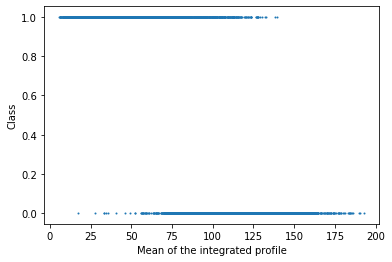

In [60]:
plt.scatter(data[' Mean of the integrated profile'], data["target_class"], s = 1)
plt.xlabel(xlabel="Mean of the integrated profile")
plt.ylabel(ylabel="Class")
plt.show()

Immediately from looking at the graph, we can tell that this is insufficeint as a discriminator.  While there is some degree of splitting of the data, there is still a large region of overlap from approximately $x=55$ to $x=125$.  Thus, to find a better set of values, we may employ Linear Diiscriminant Analysis.

In [61]:
lda = LinearDiscriminantAnalysis(solver='svd')
X_r2 = lda.fit(data.drop('target_class', axis=1).values, data['target_class'].values).transform(data.drop('target_class', axis=1).values)

In [62]:
print(X_r2)

[[-1.2414112 ]
 [-0.17036772]
 [-0.50111122]
 ...
 [ 0.40515724]
 [-0.73757723]
 [ 1.45585604]]


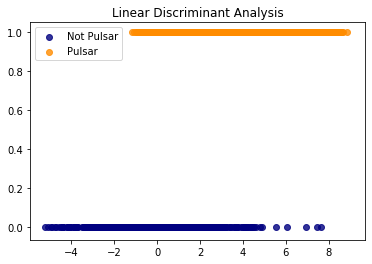

In [63]:
plt.figure()
colors = ['navy', 'darkorange']
for color, i, target_name in zip(colors, [0, 1], ["Not Pulsar", "Pulsar"]):
    plt.scatter(X_r2[data['target_class']==i, 0], [i for x in X_r2[data['target_class']==i, 0]], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', scatterpoints=1)
plt.title('Linear Discriminant Analysis')
plt.show()

It seems that a linear relationship cannot be used to accuratly model the relationship between pulsars and other objects.  Thus, we may attempt Principle Component Analysis to see if there are any latent groups that do give us the desired relation.

In [65]:
pca = PCA(n_components=2)
X_r = pca.fit(data.drop('target_class', axis=1).values).transform(data.drop('target_class', axis=1).values)

In [68]:
X_r

array([[ -27.19108609,  -29.67787512],
       [  24.47621492,   -6.02417549],
       [ -39.9389202 ,  -10.82804841],
       ...,
       [-103.26847503,   -0.56354417],
       [  31.796009  ,  -10.97930561],
       [-127.59036344,  157.16061503]])

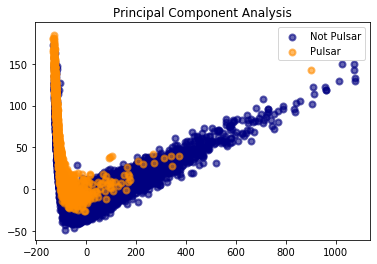

In [73]:
plt.figure()
colors = ['navy', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1], ["Not Pulsar", "Pulsar"]):
    plt.scatter(X_r[data['target_class']==i, 0], X_r[data['target_class']==i, 1], lw = lw, alpha=.6, color=color, label=target_name)
plt.legend(loc='best', scatterpoints=1)
plt.title('Principal Component Analysis')
plt.show()

Unfortuantely, this still does not produce a clear result as to which objects are pulsars.  However, this is not surprising; classifying interstellar objects is a difficult task, and the methods attempted here were relatively unsophisticated.  Problems like this one, which have clear structure but are difficult to model, help provide motivation for the ongoing research in machine learning.

## Sources
[1] 
Paper: R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656 https://arxiv.org/pdf/1603.05166.pdf

Data Set: R. J. Lyon, HTRU2, DOI: 10.6084/m9.figshare.3080389.v1.

[2] K. Liu, IPTA 2017 Student Workshop, http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf

[3] National Radia Astronomy Observatory, 2012 https://www.cv.nrao.edu/course/astr534/PulsarTiming.html

[4] Wikimedia Commons, Accessed 12/4/2019 https://en.wikipedia.org/wiki/File:Negative_and_positive_skew_diagrams_(English).svg